<a href="https://colab.research.google.com/github/vedant-1807/ProjectNotebooks/blob/main/PlantDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!1s "/content/drive/My Drive"

/bin/bash: 1s: command not found


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

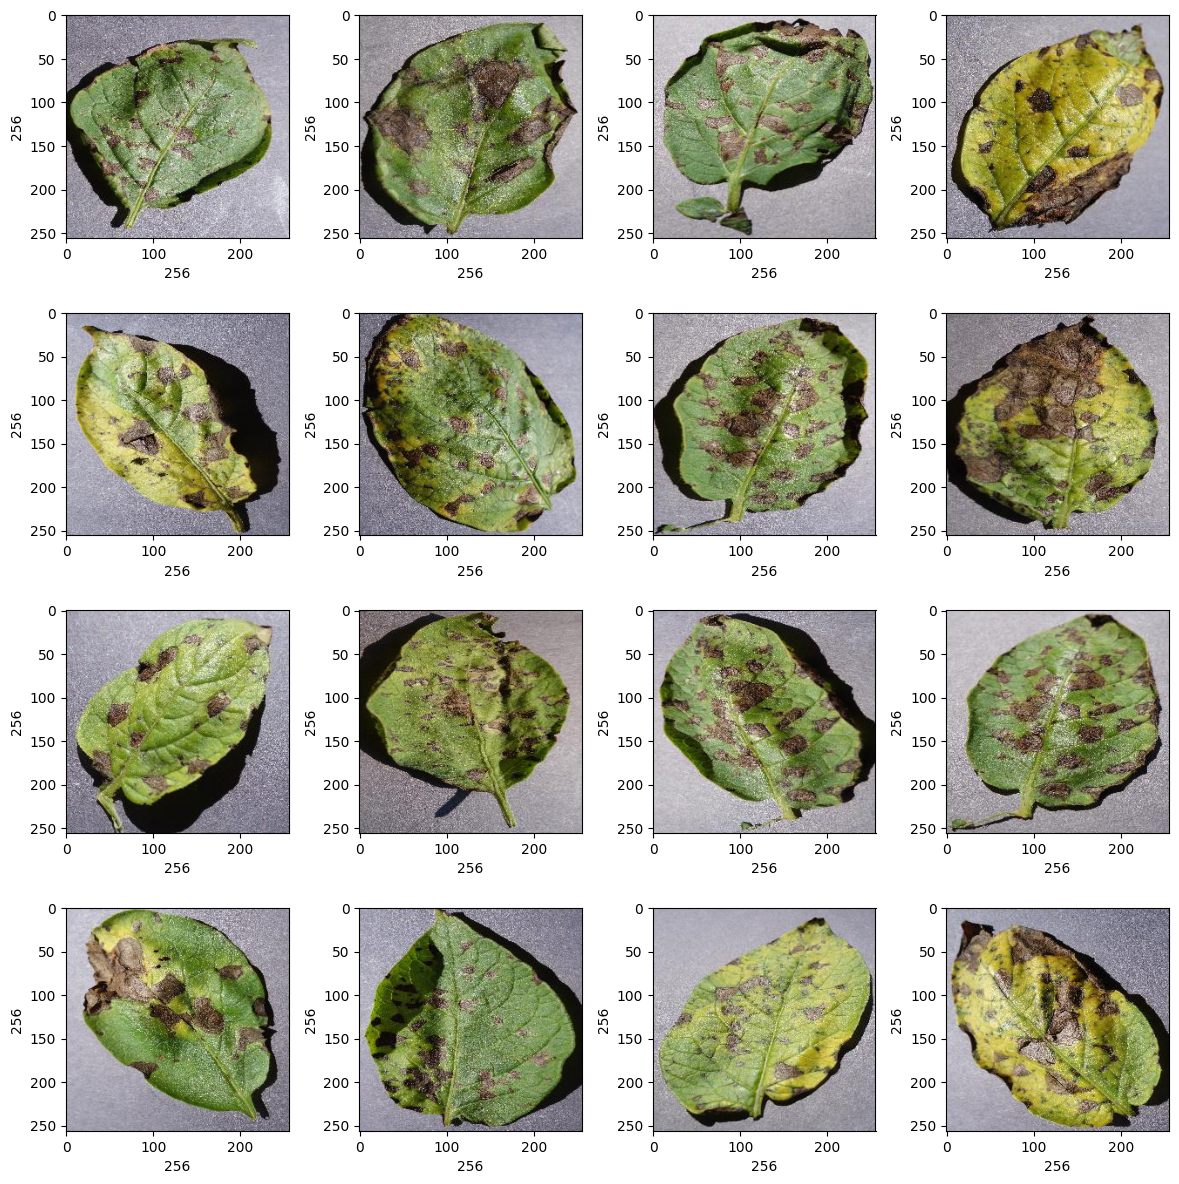

In [35]:
plt.figure(figsize=(12,12))

path = '/content/drive/MyDrive/drive/Plant_images_pianalytix/Potato___Early_blight'
for i in range(1,17):

  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [36]:
# Converting Images to array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread (image_dir)
    if image is not None :
      image = cv2.resize(image, (256,256))
    #image = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)
      return img_to_array(image)
    else :
        return np.array([])

  except Exception as e:
    print(f"Error: {e}")
    return None


In [37]:
dir = "/content/drive/MyDrive/drive/Plant_images_pianalytix"

root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacteria']
binary_labels = [0,1,2]
temp = -1
# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}") 
  temp +=1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels [temp])

In [38]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

0    300
1    300
2    300
dtype: int64

In [39]:
image_list[0].shape

(256, 256, 3)

In [40]:
label_list = np.array(label_list)
label_list

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [41]:
label_list.shape

(900,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(image_list,label_list,train_size=0.8,random_state = 10)

In [43]:
X_train = np.array(X_train, dtype=np.float16) /255.0
X_test = np.array(X_test, dtype=np.float16)/255.0

X_train = X_train.reshape(-1,256,256,3)
X_test = X_test.reshape(-1,256,256,3)

In [44]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(32, kernel_size=(3,3),padding = 'same', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,kernel_size=(3,3), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))





In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 112896)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [49]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'] )

In [50]:
X_train, X_val, y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [51]:
# training the model

epochs = 50
batch_size = 128
history = model.fit(X_train, y_train, epochs=epochs,batch_size=batch_size, validation_data =(X_val,y_val))

Epoch 1/50
5/5 [==============================] - 4s 306ms/step - loss: 3.0325 - accuracy: 0.4219 - val_loss: 0.6717 - val_accuracy: 0.6389
Epoch 2/50
5/5 [==============================] - 1s 155ms/step - loss: 0.6804 - accuracy: 0.6441 - val_loss: 0.5874 - val_accuracy: 0.6389
Epoch 3/50
5/5 [==============================] - 1s 159ms/step - loss: 0.4586 - accuracy: 0.8472 - val_loss: 0.2537 - val_accuracy: 0.9653
Epoch 4/50
5/5 [==============================] - 1s 157ms/step - loss: 0.1801 - accuracy: 0.9618 - val_loss: 0.0835 - val_accuracy: 0.9931
Epoch 5/50
5/5 [==============================] - 1s 158ms/step - loss: 0.0832 - accuracy: 0.9722 - val_loss: 0.0465 - val_accuracy: 0.9931
Epoch 6/50
5/5 [==============================] - 1s 164ms/step - loss: 0.0613 - accuracy: 0.9844 - val_loss: 0.0377 - val_accuracy: 0.9931
Epoch 7/50
5/5 [==============================] - 1s 163ms/step - loss: 0.0621 - accuracy: 0.9705 - val_loss: 0.0727 - val_accuracy: 0.9861
Epoch 8/50
5/5 [====

In [52]:
model.save("/content/drive/MyDrive/Datasets.h5")

In [53]:
# now using the json file
json_model= model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plan_model_weights.json', 'w') as json_file:
  json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

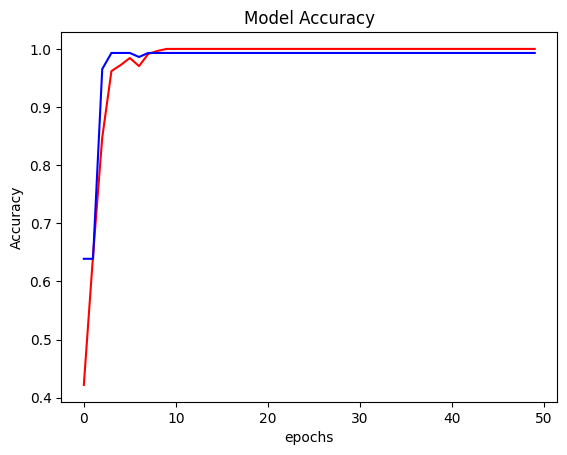

In [55]:
plt.plot(history.history['accuracy'], color= 'r')
plt.plot(history.history['val_accuracy'], color='b')

plt.title('Model Accuracy')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()
# training history

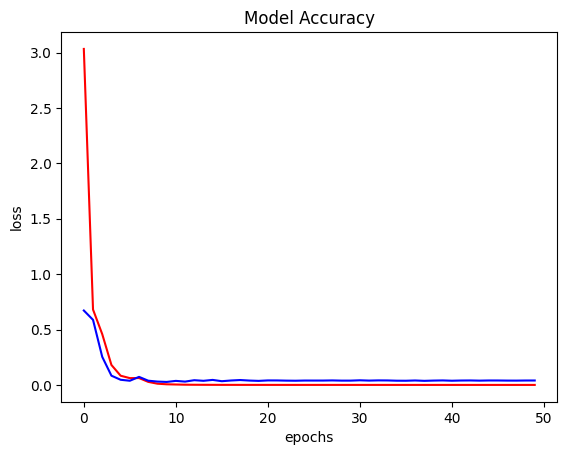

In [56]:
plt.plot(history.history['loss'], color= 'r')
plt.plot(history.history['val_loss'], color='b')

plt.title('Model Accuracy')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
# training history

In [61]:
scores = model.evaluate(X_test, y_test)
print(f"Score: {scores[1]*100}")

6/6 [==============================] - 0s 26ms/step - loss: 0.0902 - accuracy: 0.9944
Score: 99.44444298744202


In [63]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 22ms/step


In [65]:
y_pred

array([[1.69514772e-02, 9.83048201e-01, 3.68331655e-07],
       [1.00000000e+00, 2.06633377e-09, 7.16944767e-17],
       [3.78241705e-09, 2.19585432e-04, 9.99780476e-01],
       [1.00000000e+00, 1.16474946e-11, 8.25659083e-22],
       [1.00000000e+00, 3.54289514e-11, 2.84081675e-20],
       [1.45833663e-15, 9.31281274e-09, 1.00000000e+00],
       [1.00000000e+00, 6.42592590e-10, 3.67441280e-19],
       [1.14647944e-08, 9.95877504e-01, 4.12242534e-03],
       [2.62286803e-10, 1.00000000e+00, 2.52487364e-08],
       [1.16647357e-07, 9.99999881e-01, 5.37838396e-08],
       [3.68442048e-11, 9.99999762e-01, 2.64988699e-07],
       [9.99997854e-01, 2.14425108e-06, 2.06987530e-13],
       [9.31802968e-10, 1.74323286e-05, 9.99982595e-01],
       [2.71561129e-09, 5.20453788e-04, 9.99479592e-01],
       [1.00000000e+00, 4.51819098e-08, 1.05359368e-17],
       [6.05562556e-14, 1.52411019e-07, 9.99999881e-01],
       [1.00000000e+00, 2.86326865e-11, 9.51123494e-19],
       [1.00000000e+00, 3.95023

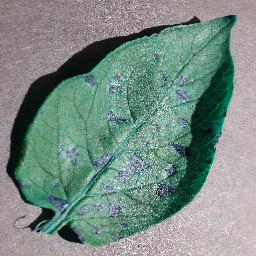

In [66]:
img = array_to_img(X_test [10])
img

In [67]:
print("Originally: ",all_labels [np.argmax (y_test [10])])
print("Predicted : ",all_labels [np.argmax (y_pred[10])])

Originally:  Potato-Early_blight
Predicted :  Potato-Early_blight
